## 4 - Treino dos modelos com H2o
![Treinar com h2o](./img/imagem4.jpg "Treino dos modelos com H2o")

## 4.1 - Instalar e iniciar o H2O

In [1]:
# Importar Biblioteca
# Iniciar o h2o

import h2o
import pandas as pd
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.estimators import H2ODeepLearningEstimator
import matplotlib.pyplot as plt
import os



h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,14 secs
H2O_cluster_timezone:,Europe/Lisbon
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_avlal_mdpxat
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.963 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [2]:
# Importar Dataset

df_h2o = h2o.import_file("./data/Life_Expectancy_Clean.csv")
print(df_h2o.columns)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['Life expectancy', 'percentage expenditure', 'Hepatitis B', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Income composition of resources', 'Schooling']


---

# 4.2 - Preparar os Dados

In [3]:

# Definir a variável alvo (Life expectancy) e as preditoras
target = "Life expectancy"
predictors = df_h2o.columns
predictors.remove(target)

# Verificar o tipo de variável alvo
print(f"Tipo de '{target}': {df_h2o[target].types}")


Tipo de 'Life expectancy': {'Life expectancy': 'real'}


In [4]:
# Dividir o dataset em treino (75%) e teste (25%)
train, test = df_h2o.split_frame(ratios=[0.75], seed=42)

# Confirmar o tamanho dos conjuntos
print(f"Treino: {train.nrows}, Teste: {test.nrows}")


Treino: 1400, Teste: 463


Rows:1863
Cols:9

,Life expectancy,percentage expenditure,Hepatitis B,Polio,Total expenditure,Diphtheria,GDP,Income composition of resources,Schooling
type,real,real,int,int,real,int,real,real,real
mins,44.0,0.0,2.0,3.0,0.74,2.0,0.986320399036006,0.0,0.0
mean,69.99511540526034,5.046539697610253,80.75523349436394,84.80139559849705,5.790128824476651,85.1610305958132,7.498668277834215,0.6423225979602791,12.285668276972626
maxs,89.0,9.850210639445612,99.0,99.0,14.39,99.0,11.688337722433907,0.936,20.7
sigma,8.605838373371093,1.9266744348144598,25.031606084196163,21.723836892937136,2.342047559678264,21.107795695172914,1.7828905793937695,0.19055184870645814,2.8786584011745155
zeros,0,5,0,0,0,0,0,64,5
missing,0,0,0,0,0,0,0,0,0
0,65.0,4.280542258460885,65.0,6.0,8.16,65.0,6.372054843111785,0.479,10.1
1,59.9,4.311115607917084,62.0,58.0,8.18,62.0,6.419500529079097,0.476,10.0
2,59.9,4.307023452400663,64.0,62.0,8.13,64.0,6.450067459449026,0.47,9.9


c:\Users\avlal\Documents\LSIG\MTAD\Life-Expectancy\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


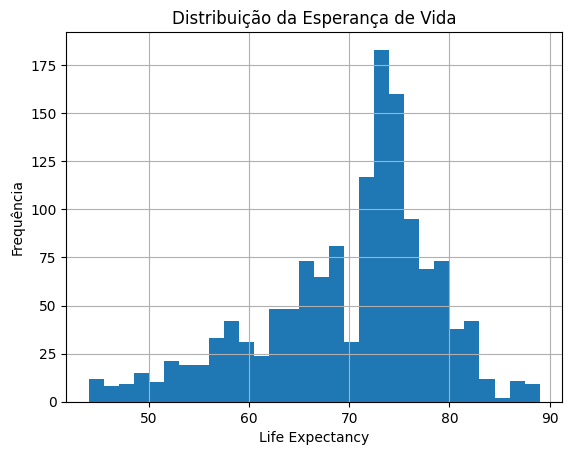

In [5]:
# Estatísticas descritivas
df_h2o.describe()

# Visualizar distribuições (com H2O ou bibliotecas externas)
import matplotlib.pyplot as plt
train.as_data_frame()[target].hist(bins=30)
plt.title("Distribuição da Esperança de Vida")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequência")
plt.show()


## 4.3 - Treino e Avaliação modelos de regressão (Supervionados)

### Treino com Distributed Random Forest (DRF)

In [6]:
# Inicializar o modelo DRF
model_default = H2ORandomForestEstimator(seed=42)

# Treinar o modelo com as variáveis preditoras e a variável alvo
model_default.train(x=predictors, y=target, training_frame=train)

# Exibir as métricas do modelo no conjunto de treino
model_default.show()


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1733677842935_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          529626                 20           20           20            808           868           840.02

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 11.890612708564452
RMSE: 3.448276773776208
MAE: 2.46138810149503
RMSLE: 0.054550242891893024
Mean Residual Deviance: 11.890612708564452

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-12-08 17:11:22  0.014 sec   0.0                nan                 nan                 nan
     2024-12-08 17:11:22  0.205 sec   1.0                5.534337102411855   3.745227872521432   30.628887163132443
     2024-12-08 17:11:22  0.244 sec   2.0                5.59086987746461    3.7921623494320302  31.257825986741146
     2024-12-08 17:11:22  0.269 sec   3.0                5.2262208800506995  3.6167449157968665  27.313384687077907
     2024-12-08 17:11:22  0.291 sec   4.0                5.130325053883394   3.5067930402515364  26.320235158503646
     2024-12-08 17:11:22  0.314 sec   5.0                5.007082285818313   3.4484069515899316  25.070873016955534
     2024-12-08 17:11:22  0.336 sec   6.0                4.755003063132002   3.3001160587617986  22.610054130394722
     2024-12-08 17:11:22  0.356 sec   7.0                4.539511272013888   3.151443034791268   20.607162588741147
     2024-12-08 17:11:22  0.379 sec   8.0                4.348057485080639   3.0270887964509865  18.905603893565765
     2024-12-08 17:11:22  0.407 sec   9.0                4.238918280119112   2.96262106315907    17.968428185527966
---  ---                  ---         ---                ---                 ---                 ---
     2024-12-08 17:11:23  0.965 sec   41.0               3.5048215407241954  2.5050441426922982  12.283774032324324
     2024-12-08 17:11:23  0.976 sec   42.0               3.5013757739745204  2.501781947013387   12.259632310575672
     2024-12-08 17:11:23  0.987 sec   43.0               3.491188630908317   2.4969848194203927  12.188398056583488
     2024-12-08 17:11:23  0.999 sec   44.0               3.488085326637804   2.495202871016242   12.166739245905955
     2024-12-08 17:11:23  1.010 sec   45.0               3.4786444316667264  2.4885165659333586  12.100967081965921
     2024-12-08 17:11:23  1.024 sec   46.0               3.463008851377901   2.474618675988659   11.99243030472169
     2024-12-08 17:11:23  1.035 sec   47.0               3.4613694460549485  2.4697338327595433  11.981078442082742
     2024-12-08 17:11:23  1.046 sec   48.0               3.4611022971982965  2.4702246907628553  11.979229111671325
     2024-12-08 17:11:23  1.057 sec   49.0               3.440238111123415   2.4592329850595824  11.835238261226001
     2024-12-08 17:11:23  1.067 sec   50.0               3.448276773776208   2.46138810149503    11.890612708564452
[51 rows x 7 columns]


Variable Importances: 
variable                         relative_importance    scaled_importance    percentage
-------------------------------  ---------------------  -------------------  ------------
Income composition of resources  1.3351e+06             1                    0.333349
Schooling                        1.08196e+06            0.810392             0.270143
percentage expenditure           441253                 0.330501             0.110172
GDP                              439534                 0.

### Treino com Gradient Boosting Machine (GBM)

In [7]:
# Inicializar o modelo GBM com configurações padrão
model_gbm = H2OGradientBoostingEstimator(seed=42)

# Treinar o modelo com as variáveis preditoras e a variável alvo
model_gbm.train(x=predictors, y=target, training_frame=train)

# Exibir as métricas do modelo no conjunto de treino
model_gbm.show()


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1733677842935_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          17037                  5            5            5             7             30            22.5

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 6.204794805367783
RMSE: 2.4909425536065224
MAE: 1.8106659834725516
RMSLE: 0.03909802473712683
Mean Residual Deviance: 6.204794805367783

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-12-08 17:11:28  0.003 sec   0.0                8.644424880597851   6.9003105991659375  74.72608151629919
     2024-12-08 17:11:28  0.034 sec   1.0                7.927180783250788   6.322234693254743   62.84019517034057
     2024-12-08 17:11:28  0.046 sec   2.0                7.291703024843843   5.8010421589442664  53.16893300251684
     2024-12-08 17:11:28  0.058 sec   3.0                6.736381700650286   5.340111530848912   45.378838416856034
     2024-12-08 17:11:28  0.068 sec   4.0                6.241391653765934   4.932089048113141   38.954969775699055
     2024-12-08 17:11:28  0.076 sec   5.0                5.8081981177920365  4.566768526349749   33.73516537552296
     2024-12-08 17:11:28  0.084 sec   6.0                5.4240417054110885  4.246029960087368   29.420228422038832
     2024-12-08 17:11:28  0.092 sec   7.0                5.093224570964092   3.9617815017700195  25.940936530272364
     2024-12-08 17:11:28  0.100 sec   8.0                4.8045863251313765  3.712001702444894   23.084049755639427
     2024-12-08 17:11:28  0.109 sec   9.0                4.558432932029069   3.4974514906747     20.779310795807135
---  ---                  ---         ---                ---                 ---                 ---
     2024-12-08 17:11:28  0.312 sec   41.0               2.602523301243797   1.8913395064217704  6.773127533516911
     2024-12-08 17:11:28  0.317 sec   42.0               2.5922429671711367  1.8847145761762347  6.719723600848218
     2024-12-08 17:11:28  0.323 sec   43.0               2.5603301966445957  1.8630040196010045  6.555290715850154
     2024-12-08 17:11:28  0.328 sec   44.0               2.548254867762736   1.8538254274640764  6.493602871076479
     2024-12-08 17:11:28  0.333 sec   45.0               2.544011856543864   1.8510578101021904  6.471996326235759
     2024-12-08 17:11:28  0.338 sec   46.0               2.5331651349300497  1.8414514051164899  6.416925600825177
     2024-12-08 17:11:28  0.344 sec   47.0               2.5275200481589644  1.8367482049124582  6.388357593845493
     2024-12-08 17:11:28  0.349 sec   48.0               2.517722284476653   1.8289904376438686  6.338925501750335
     2024-12-08 17:11:28  0.355 sec   49.0               2.505200606400411   1.82055330821446    6.276030078308987
     2024-12-08 17:11:28  0.360 sec   50.0               2.4909425536065224  1.8106659834725516  6.204794805367783
[51 rows x 7 columns]


Variable Importances: 
variable                         relative_importance    scaled_importance    percentage
-------------------------------  ---------------------  -------------------  ------------
Income composition of resources  433708                 1                    0.858928
GDP                              21972.1                0.0506611            0.0435142
Schooling                        17208.4                0.0396773            0.0340799
Total expenditure                14007.2            

---
## 4.4 Como os Fatores Socioeconómicos Influenciam a Expectativa de Vida?

Para respondermos a esta questão, vamos assim precisar das variáveis relacionadas aos fatores socioeconómicos, usando o modelo Random Forest:

* GDP (Produto Interno Bruto)
* Income composition of resources

Estas serão as variáveis preditivas (X) e a variável alvo continuará a ser Life expectancy.

c:\Users\avlal\Documents\LSIG\MTAD\Life-Expectancy\.venv\Lib\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Impacto dos Fatores Socioeconômicos no Desempenho
Mean Absolute Error (MAE): 2.65
Mean Squared Error (MSE): 14.69
R² Score: 0.80


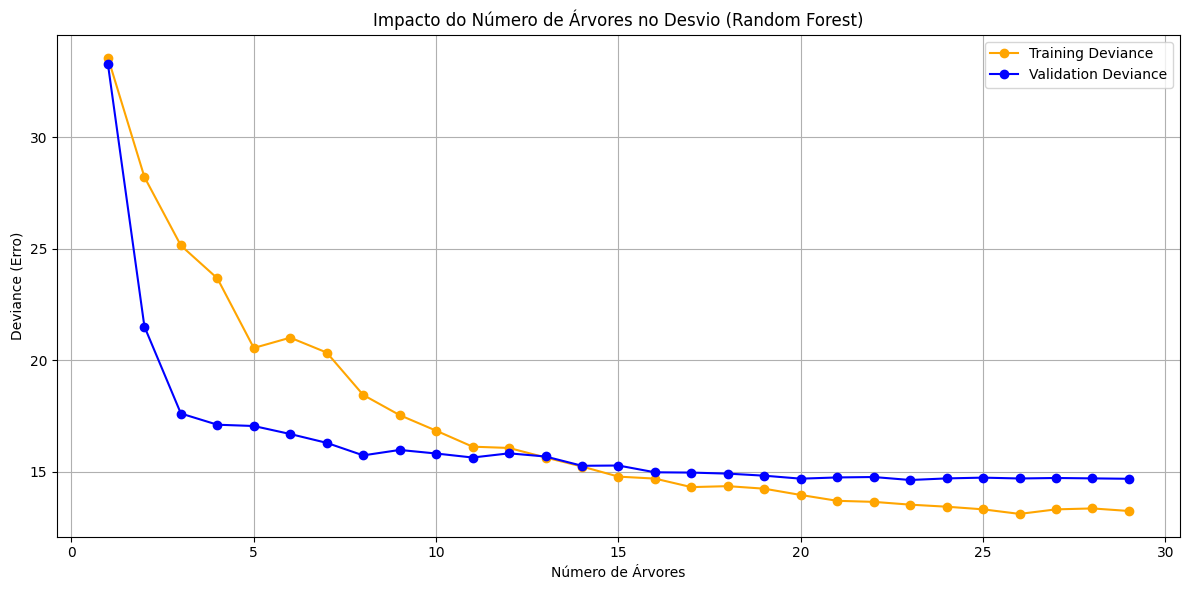

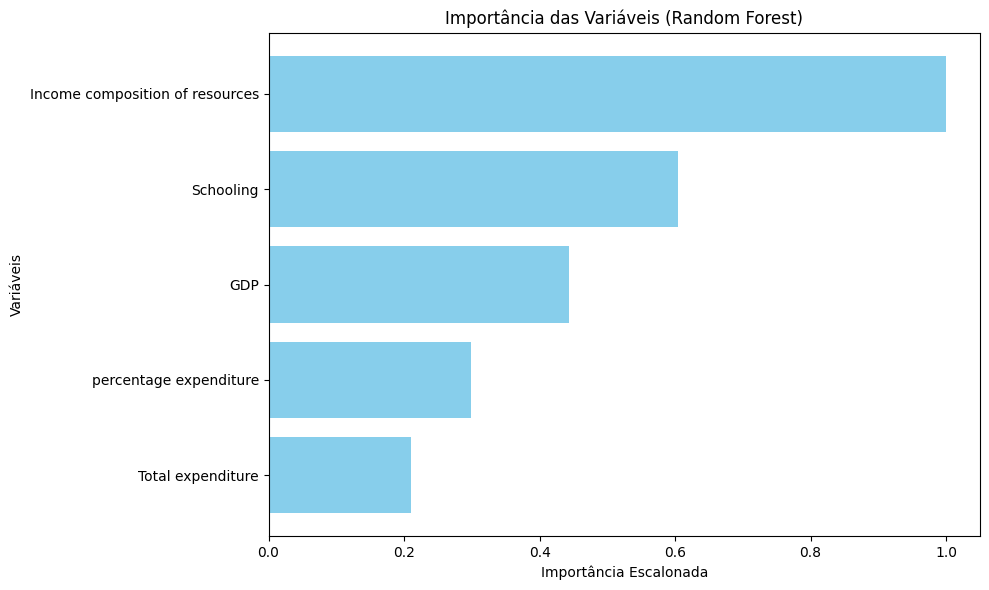

In [8]:
# Selecionar as variáveis socioeconómicas
socioeconomic_predictors = ['percentage expenditure', 'Total expenditure', 'GDP', 'Income composition of resources', 'Schooling']
target = 'Life expectancy'

# Preparar os dados para treino e teste
X1 = df_h2o[socioeconomic_predictors]
y1 = df_h2o[target]

# Dividir os dados
train1, test1 = df_h2o.split_frame(ratios=[0.75], seed=42)

# Configurar o modelo Random Forest
rf_model1 = H2ORandomForestEstimator(
    ntrees=300, 
    max_depth=20,
    stopping_rounds=5, 
    stopping_metric='deviance', 
    stopping_tolerance=0.001, 
    seed=42
)

# Treinar o modelo com os dados de treino
rf_model1.train(x=socioeconomic_predictors, y=target, training_frame=train1, validation_frame=test1)

# Avaliar o modelo no conjunto de validação
performance_rf1 = rf_model1.model_performance(test1)

# Obter as métricas de desempenho
mae = performance_rf1.mae()
mse = performance_rf1.mse()
r2 = performance_rf1.r2()

# Apresentar os resultados
print("="*50)
print("Impacto dos Fatores Socioeconômicos no Desempenho")
print("="*50)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("="*50)

# Obter o histórico de pontuação do modelo
scoring_history = rf_model1.scoring_history()

# Criar o gráfico de desvio (deviance)
plt.figure(figsize=(12, 6))

# Adicionar linha para o desvio no treino
plt.plot(scoring_history['number_of_trees'], scoring_history['training_deviance'], label="Training Deviance", color="orange", marker="o")

# Adicionar linha para o desvio na validação (teste)
if 'validation_deviance' in scoring_history.columns:
    plt.plot(scoring_history['number_of_trees'], scoring_history['validation_deviance'], label="Validation Deviance", color="blue", marker="o")

# Configurar o gráfico
plt.title("Impacto do Número de Árvores no Desvio (Random Forest)")
plt.xlabel("Número de Árvores")
plt.ylabel("Deviance (Erro)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Obter a importância das variáveis
importance = rf_model1.varimp(use_pandas=True)

# Criar gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importance['variable'], importance['scaled_importance'], color="skyblue")
plt.title("Importância das Variáveis (Random Forest)")
plt.xlabel("Importância Escalonada")
plt.ylabel("Variáveis")
plt.gca().invert_yaxis()  # Inverter a ordem das variáveis no eixo Y
plt.tight_layout()
plt.show()


In [9]:
import os

# Diretório onde o modelo será salvo
save_dir = "./models"
custom_model_name = "rf_socioeconomic_model"

# Caminho final desejado para o modelo
model_path_final = os.path.join(save_dir, custom_model_name)

# Salvar o modelo no diretório especificado
model_path = h2o.save_model(model=rf_model1, path=save_dir, force=True)

# Verificar se o arquivo já existe e sobrescrever
if os.path.exists(model_path_final):
    os.remove(model_path_final)  # Remove o arquivo existente

# Renomear automaticamente para o nome personalizado
os.rename(model_path, model_path_final)

print(f"Modelo salvo com o nome personalizado em: {model_path_final}")



Modelo salvo com o nome personalizado em: ./models\rf_socioeconomic_model


---
## 4.5 Qual o Impacto das Taxas de Vacinação na Mortalidade Infantil e Expectativa de Vida?

Para respondermos à questão, vamos assim precisar das variáveis relacionadas às taxas de vacinação usando o modelo Random Forest:

* Hepatitis B
* Polio
* Diphtheria
* percentage expenditure (variável)

Estas serão as variáveis preditivas (X) e a variável alvo continuará a ser Life expectancy.

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Impacto das Taxas de Vacinação no Desempenho
Mean Absolute Error (MAE): 4.86
Mean Squared Error (MSE): 45.48
R² Score: 0.37


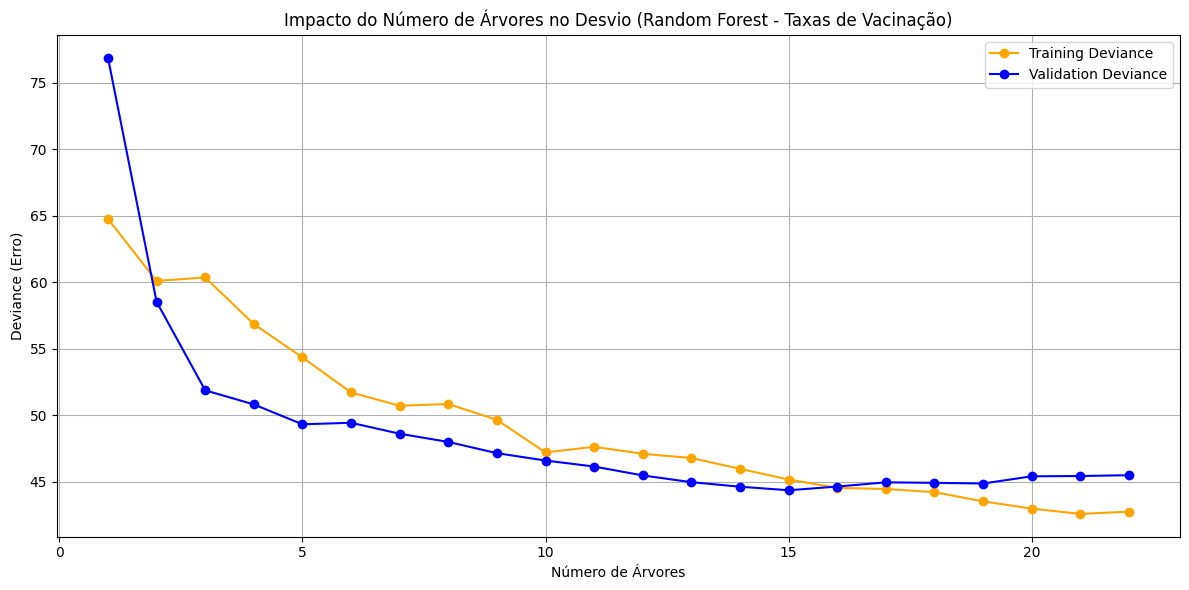

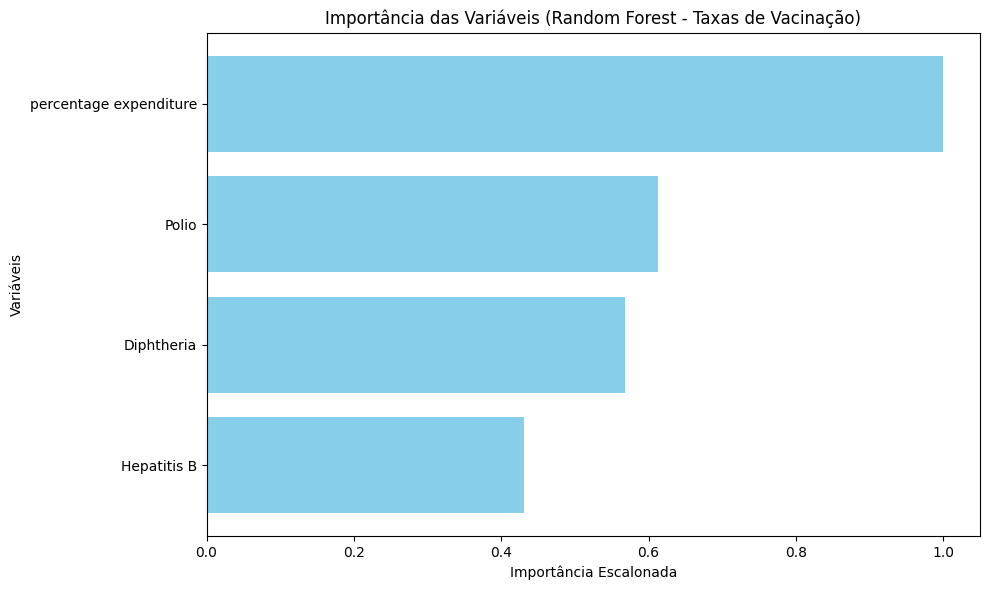

In [10]:
# Selecionar as variáveis relacionadas às taxas de vacinação
vaccination_predictors = ['Hepatitis B', 'Polio', 'Diphtheria', 'percentage expenditure']

target = 'Life expectancy'

# Configurar o modelo Random Forest
rf_model2 = H2ORandomForestEstimator(
    ntrees=300, 
    max_depth=20,
    stopping_rounds=5, 
    stopping_metric='deviance', 
    stopping_tolerance=0.001, 
    seed=42
)

# Treinar o modelo com os dados de treino e validação
rf_model2.train(x=vaccination_predictors, y=target, training_frame=train1, validation_frame=test1)

# Avaliar o modelo no conjunto de validação
performance_rf2 = rf_model2.model_performance(test1)

# Obter as métricas de desempenho
mae = performance_rf2.mae()
mse = performance_rf2.mse()
r2 = performance_rf2.r2()

# Apresentar os resultados
print("="*50)
print("Impacto das Taxas de Vacinação no Desempenho")
print("="*50)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("="*50)

# Obter o histórico de pontuação do modelo
scoring_history = rf_model2.scoring_history()

# Criar o gráfico de desvio (deviance)
plt.figure(figsize=(12, 6))

# Adicionar linha para o desvio no treino
plt.plot(scoring_history['number_of_trees'], scoring_history['training_deviance'], label="Training Deviance", color="orange", marker="o")

# Adicionar linha para o desvio na validação (teste)
if 'validation_deviance' in scoring_history.columns:
    plt.plot(scoring_history['number_of_trees'], scoring_history['validation_deviance'], label="Validation Deviance", color="blue", marker="o")

# Configurar o gráfico
plt.title("Impacto do Número de Árvores no Desvio (Random Forest - Taxas de Vacinação)")
plt.xlabel("Número de Árvores")
plt.ylabel("Deviance (Erro)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Obter a importância das variáveis
importance = rf_model2.varimp(use_pandas=True)

# Criar gráfico da importância das variáveis
plt.figure(figsize=(10, 6))
plt.barh(importance['variable'], importance['scaled_importance'], color="skyblue")
plt.title("Importância das Variáveis (Random Forest - Taxas de Vacinação)")
plt.xlabel("Importância Escalonada")
plt.ylabel("Variáveis")
plt.gca().invert_yaxis()  # Inverter a ordem das variáveis no eixo Y
plt.tight_layout()
plt.show()


In [11]:
import os

# Diretório onde o modelo será salvo
save_dir = "./models"
custom_model_name = "rf_vaccination_model"

# Caminho final desejado para o modelo
model_path_final = os.path.join(save_dir, custom_model_name)

# Salvar o modelo no diretório especificado
model_path = h2o.save_model(model=rf_model2, path=save_dir, force=True)

# Verificar se o arquivo já existe e sobrescrever
if os.path.exists(model_path_final):
    os.remove(model_path_final)  # Remove o arquivo existente

# Renomear automaticamente para o nome personalizado
os.rename(model_path, model_path_final)

print(f"Modelo salvo com o nome personalizado em: {model_path_final}")




Modelo salvo com o nome personalizado em: ./models\rf_vaccination_model


In [12]:
# Fazer previsões no conjunto de teste e salvar como CSV
predictions = rf_model1.predict(test1).as_data_frame()
test_data = test1.as_data_frame()
test_data['Predicted Life Expectancy'] = predictions['predict']
test_data.to_csv("./data/socioeconomic_predictions.csv", index=False)

print("Previsões e dados de teste salvos como CSV.")

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


c:\Users\avlal\Documents\LSIG\MTAD\Life-Expectancy\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
c:\Users\avlal\Documents\LSIG\MTAD\Life-Expectancy\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Previsões e dados de teste salvos como CSV.
